# A Classification Model for Predicting Whether Individuals got their H1N1 Vaccines

## 1a. Business Understanding

Vaccination has become a key public health measure that is used to fight and in most cases curb infectious diseases. Vaccines provide immunization for individuals and having a community participate in the process can further decrease the spread of diseases as a result of the concept of "herd immunity." 

Our stakeholders in this case are the researchers, the government and patients who hope to benefit from the predictions made by this model. The idea is to come up with a classification modek that will predict (almost) accurately whether individuals were immunized with H1N1 vacciness. 

### b. Problem Statement

### c. Data Understanding

The data used in this project was retrieved from [DrivenData](https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/). The dataset contains data on training features, training labels, test features and the submission format. The data on the training features (the input variables that the model will use to predict the probability that people received H1N1 flu vaccines and seasonal flu vaccines) contains 35 feature columns in total, each a response to a survey question. These questions cover several different topics, such as whether people observed safe behavioral practices, their opinions about the diseases and the vaccines, and their demographics.The data on training labels (the labels corresponding to the observations in the training features) contains two target variables : h1n1_vaccine and seasonal_vaccine. Both are binary variables, with 1 indicating that a person received the respective flu vaccine and 0 indicating that a person did not receive the respective flu vaccine.

### d. metrics of success
Accuracy

Precision

Recall

F1-Score

ROC/AUC curve

## 2. Loading and checking the data

We first start by importing the necessary libaries. 

In [1]:
# numpy for high-level mathematical functions on arrays
import numpy as np
# pandas for tablular data analysis and manipulation
import pandas as pd
# seaborn and matplotlib for data visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Next up, Load the dataset

In [2]:
# previewing the top of our dataset
features_df = pd.read_csv("training_set_features.csv")
features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
# checking the bottom of our dataset
features_df.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [4]:
# checking the number of records in our dataset
def data_shape(data):
    """Returns the shape of the data"""
    rows = data.shape[0]
    cols = data.shape[1]
    print(f"The dataframe has:\n\t*  {rows} rows\n\t*  {cols} columns")

In [5]:
data_shape(features_df)

The dataframe has:
	*  26707 rows
	*  36 columns


This dataset contains 26707 observations and 36 columns. 

The features dataset contains a combination of floats, integers and object data types. 

In [6]:
# Checking whether each column has an appropriate datatype 
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [7]:
# checking the top of our labels dataset
labels_df = pd.read_csv("training_set_labels.csv")
labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [8]:
# checking the bottom of our labels dataset
labels_df.tail()

,respondent_id,h1n1_vaccine,seasonal_vaccine
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0
26706,26706,0,0


In [9]:
# checking whether the columns have consistent and appropriate data types
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [10]:
# determining the number of records in our labels dataframe
data_shape(labels_df)

The dataframe has:
	*  26707 rows
	*  3 columns


The labels dataframe contains 26707 observations and 3 columns.

In [11]:
# previewing the test dataframe
test_df = pd.read_csv("test_set_features.csv")
test_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [12]:
test_df.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26707,53414,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,NaN,Not Married,Rent,Employed,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,xtkaffoo


## 4. Data Preparation

Before the data is ready to use, there is need for tidying to ensure consistency, handle missing values, and duplicates.The dataset for one, contains two target variables, the probability that individuals received H1N1 vaccines and seasonal vaccines. For this prject however, the intention is to work with one target variable, the probability of H1N1 vaccine reception, therefore, columns representing the probability of seasonal vaccines will be dropped.

In [13]:
# dropping columns related to seasonal vaccine in the features dataframe
new_features_df = features_df.drop(['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1)
new_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [14]:
# dropping columns related to seasonal vaccine in the labels dataframe
new_labels_df = labels_df.drop(['seasonal_vaccine'], axis=1)
new_labels_df.head()

,respondent_id,h1n1_vaccine
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


We now combine the labels and features into one dataframe

In [15]:
# joining the labels and features into one dataframe
joined_df = new_features_df.merge(new_labels_df, on='respondent_id', how='left')
print(joined_df.shape)
joined_df.head()

(26707, 33)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [16]:
# dropping columns related to seasonal vaccine in the test features dataframe
new_test_df = test_df.drop(['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1)
new_test_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


The resulting dataset has 26708 rows and 32 columns

#### Handling missing values
We check for missing values in the new_features_df

In [17]:
# checking for missing values in the dataset
joined_df.isna().sum().sum()

57089

In [18]:
# checking for what percentage of the total data is missing values
def identify_missing_values(data):
    """A simple function to check if data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing

missing_data = identify_missing_values(joined_df)
missing_data

,Missing Values,Percentage(%)
employment_occupation,13470,0.504362
employment_industry,13330,0.499120
health_insurance,12274,0.459580
income_poverty,4423,0.165612
doctor_recc_h1n1,2160,0.080878
rent_or_own,2042,0.076459
employment_status,1463,0.054780
marital_status,1408,0.052720
education,1407,0.052683
chronic_med_condition,971,0.036358


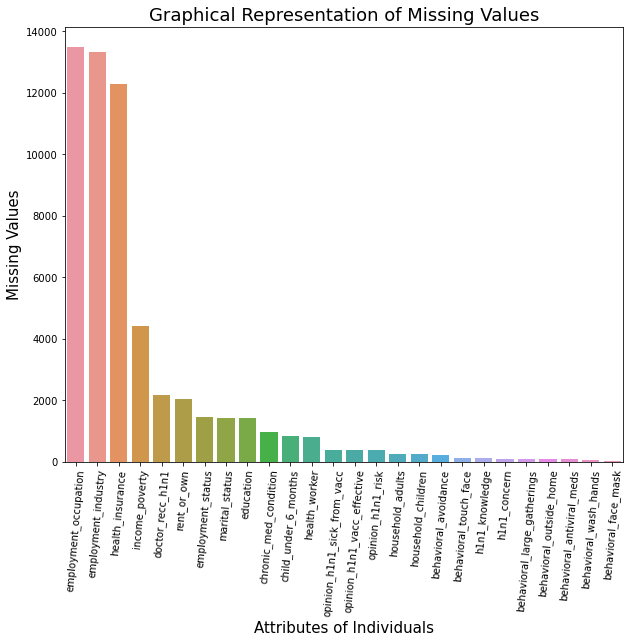

In [19]:
#  graphical representation
fig, axes = plt.subplots(figsize = (10, 8))

# plot a bargraph
sns.barplot(x = missing_data.index , y = missing_data["Missing Values"])
# labeling the axes 
plt.xlabel("Attributes of Individuals", fontsize = 15)
# rotating our xticks 
plt.xticks(rotation = '85')
# labeling the y axis 
plt.ylabel("Missing Values", fontsize = 15)
# title 
plt.title("Graphical Representation of Missing Values", fontsize = 18)
# display
plt.show()

# save the plot 
fig.savefig("miss.png")

Following the above outcome, the dataset has a very high number of missing values. To handle the missing values, we drop the columns with the missing values above 40% of the data, that is employment_occupation, employment_industry, and health_insurance.

In [20]:
# dropping all the columns with missing values
joined_df = joined_df.drop(['employment_occupation', 'employment_industry', 'health_insurance'], axis=1)
joined_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0


Now we have 30 columns left. For the remaining missing values, we will handle them by filling in the missing values depending on the type of missing values they are.

First, we handle these missing values by filling with the mode.

In [21]:
# handling missing values in the remaining columns
joined_df=joined_df.fillna(joined_df.mode())
joined_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0


In [22]:
# confirm that we have handled all the missing values
joined_df.isna().sum()


respondent_id                     0
h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
hhs_geo_region                    0
census_msa                        0
household_adults            

Some columns still have missing values, so we need to fix that too. For this columns, we will create a function that will ensure we fill the missing values with a specific value.

In [23]:
# creating a function for filling the missing values
def fill_missing(data, column, fill):
    """Simple function to fill msiing values with specific value"""
    data[column] = data[column].fillna(fill)
    # column values after replacing values
    out = data[column].value_counts()

    return out

In [24]:
# dealing with the education column
joined_df.loc[:,"education"]

0              < 12 Years
1                12 Years
2        College Graduate
3                12 Years
4            Some College
               ...       
26702        Some College
26703    College Graduate
26704        Some College
26705        Some College
26706        Some College
Name: education, Length: 26707, dtype: object

To deal with the missing values in this case we will replace the missing values with NA because education options available might not have been applicable to some of the individuals hence the missing values

In [25]:
fill_missing(joined_df, "education", "NA")

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
NA                   1407
Name: education, dtype: int64

In [26]:
# dealing with the income_poverty column
joined_df.loc[:,"income_poverty"]

0                    Below Poverty
1                    Below Poverty
2        <= $75,000, Above Poverty
3                    Below Poverty
4        <= $75,000, Above Poverty
                   ...            
26702    <= $75,000, Above Poverty
26703    <= $75,000, Above Poverty
26704                          NaN
26705    <= $75,000, Above Poverty
26706    <= $75,000, Above Poverty
Name: income_poverty, Length: 26707, dtype: object

The options available for the income_poverty seem to be only below and above poverty. The missing data may be due to the indivuals failing to provide information on their income or they do not have an income to write about. Given this information, we will replace the missing value with 'at poverty line'.

In [27]:
fill_missing(joined_df, "income_poverty", "At Poverty Line")

<= $75,000, Above Poverty    12777
> $75,000                     6810
At Poverty Line               4423
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [28]:
# dealing with rent_or_own
joined_df.loc[:,"rent_or_own"]

0         Own
1        Rent
2         Own
3        Rent
4         Own
         ... 
26702     Own
26703    Rent
26704     Own
26705    Rent
26706     Own
Name: rent_or_own, Length: 26707, dtype: object

It is quite difficult to tell for what reason this information is missing. It my be that it applies to minors, or older people who may be staying in nursing home or the like. For this reason we will replace the missing values with NA.

In [29]:
fill_missing(joined_df, "rent_or_own", "NA")

Own     18736
Rent     5929
NA       2042
Name: rent_or_own, dtype: int64

In [30]:
# dealing with employment status
joined_df.loc[:,"employment_status"]

0        Not in Labor Force
1                  Employed
2                  Employed
3        Not in Labor Force
4                  Employed
                ...        
26702    Not in Labor Force
26703              Employed
26704                   NaN
26705              Employed
26706    Not in Labor Force
Name: employment_status, Length: 26707, dtype: object

For the missing data in this case, we will fill the missing values with Not in Labor Force

In [31]:
fill_missing(joined_df, "employment_status", "Not in Labor Force")

Employed              13560
Not in Labor Force    11694
Unemployed             1453
Name: employment_status, dtype: int64

In [32]:
# dealing with marital status
joined_df.loc[:,"marital_status"]

0        Not Married
1        Not Married
2        Not Married
3        Not Married
4            Married
            ...     
26702    Not Married
26703    Not Married
26704    Not Married
26705        Married
26706        Married
Name: marital_status, Length: 26707, dtype: object

We replace the missing values in this case with NA

In [33]:
fill_missing(joined_df, "marital_status", "NA")

Married        13555
Not Married    11744
NA              1408
Name: marital_status, dtype: int64

Now let's confirm that our dataset does not have anymore missing values

In [34]:
joined_df.isna().sum()

respondent_id                     0
h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
age_group                         0
education                         0
race                              0
sex                               0
income_poverty                    0
marital_status                    0
rent_or_own                       0
employment_status                 0
hhs_geo_region                    0
census_msa                        0
household_adults            

Our data does not contain any more missing values

#### cheking for duplicates

In [35]:
# check for duplicates
joined_df.duplicated().any()

False

The dataset has no duplicates

Some columns like respondent_id and hhs_geo_region contain information that does not make much sense rendering it irrelevant. The colums are therefore dropped.

In [36]:
# dropping unwanted observations
def drop_unwated_observations(data, columns):
    """Simple function to drop unwated observations."""
    data.drop([columns], axis=1, inplace=True)

In [37]:
drop_unwated_observations(joined_df, "respondent_id")

In [38]:
drop_unwated_observations(joined_df, "hhs_geo_region")

In [39]:
joined_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


Now we have 28 columns to work with as we move to the EDA section

## 5. Exploratory Data Analysis


In this section, we explore the dataset further to better understand which individuals' attributes are highly related to H1N1 vaccine, and ultimately to build a classification model that can accurately predict whether someone received the H1N1 vaccine based on their measurements. By exploring the data, we may be able to see which variables — or which combination of variables — provide the most information about whether or not the individualgot the vaccine.

We will start by looking at how the features correlate with the target variable.